In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env_hard as solitaire_env_hard
import sys
import seaborn as sns
import pickle as pkl
import gp
import test_env
import tqdm.notebook as tq
#sys.setrecursionlimit(10**6)

In [2]:
with open("games/run_hardgame_2020-06-01 16:01:30.326416.pkl","rb") as file:
    run_data = pkl.load(file)

In [3]:
actions_matrix = run_data['actions_matrix']

In [4]:
iterations_used_per_game = run_data['iterations_used_per_game']
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [5]:
iterations_used_per_game = run_data['iterations_used_per_game']
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [6]:
max_action_take = max(it.index)
max_action_take 

869

### Game that resulted into victory with longest action sequence

In [7]:
longest_action_seq_win_gno = None
longest_action_seq_win_start_state = None
longest_action_seq_win_steps = 0
longest_action_seq_win_action_description = None
longest_action_seq_win_action_sequence = None
for game,actions,end_state,start_state,game_states,reason,action_description in actions_matrix:
    
    if reason =='won' and len(actions) > longest_action_seq_win_steps:
        
        longest_action_seq_win_steps = len(actions)
        longest_action_seq_win_gno = game
        
        longest_action_seq_win_start_state = start_state
        longest_action_seq_win_action_sequence = actions
        longest_action_seq_win_action_description = action_description
        
        
print(longest_action_seq_win_gno,longest_action_seq_win_steps)

157 869


### Frequency of actions in the longest sequence won game

In [8]:
"".join([str(x) for x in longest_action_seq_win_action_sequence])

'02231332333333203223332003122445113201111111244134414144414144414141151111444115441514441414441414451111114444114441451111144441144441115144114415111344144411451114511444414111514414415114414441441144414411151441144144411441145115111144411511444411444144151114441441441414411154411511111444411511114414441151144144144411514144414144414411444411411511144414414414141151144151144441144144411451111144414441151111444115441444114414414415111114444114441414415111114441441415111444144144141445111111444411444411151111441514441144414441151114441441441151114444114444114141151144411444141411511111114414441154411444411451444141444141151114444114414441145111114441441441445111111444144154441511111444144411511144441144144144151111144441144411541444111511444414115114441145144441514411511144144411511441444141151111111441441441511111242451115515020111111111111111111111111111111'

In [9]:
action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
for a in longest_action_seq_win_action_sequence:
    action_freq[a]+=1

In [10]:
action_idx2des = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }

In [11]:
dic_items = list(action_freq.items())
dic_items.sort(key = lambda x:x[1])
keys = [action_idx2des[x[0]] for x in dic_items]
values = [x[1] for x in dic_items]

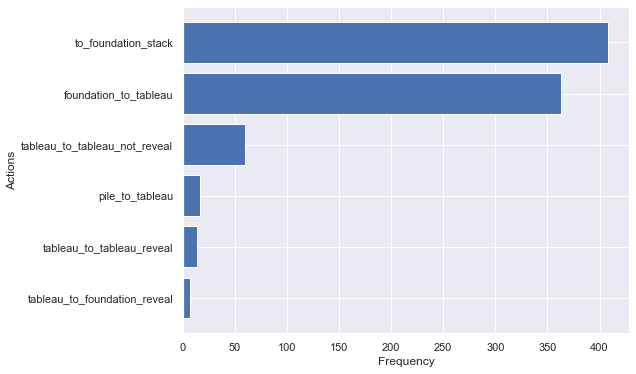

In [12]:
sns.set()
fig,ax = plt.subplots()
d = pd.DataFrame(data={"action":keys,"frequency":values})
ax.barh(width = 'frequency', y= 'action',data = d)
ax.set_yticks(d['action'])
fig.set_figheight(6)
fig.set_figwidth(8)
ax.set_xlabel("Frequency")
ax.set_ylabel("Actions")
plt.show()

In [13]:
assert(len(longest_action_seq_win_action_description)==len(longest_action_seq_win_action_sequence))

### Verify longest sequence won game

In [14]:
env = test_env.TestEnv(longest_action_seq_win_start_state)
won = False
for i,action_data in enumerate(longest_action_seq_win_action_description):
    
    action_type = action_data[0]
    
    won,taken = env.step(action=action_type,debug=False,action_data=action_data)
    if taken == False:
        
        print("verifier failed",action_data)
        
        break
        
print(won,i)
    

True 868


The test environment too results into terminal state for the longest sequence game that was won

### Verify each game

In [15]:
cnt = 0
for game,action_seq,end_state,start_state,game_states,reason,action_description in actions_matrix:
    if reason =='won':
        en = test_env.TestEnv(start_state)
        for k in range(len(action_seq)):
            
            action_data = action_description[k]
            action = action_data[0]
            #print("action type ",k,action,actions_seq[0][k])
            w,t = en.step(action,False,action_data)

            if t == False:
                print("action not taken",game,k)
                break
                
            if w == True:
                cnt+=1
print(cnt)

227


### Check maximum number of states that can be  hashed

In [27]:
env = solitaire_env_hard.env()

for i in range(4):
    env.state.foundation[i] = [0]*13
                        
for cd in env.state.pile:
    
    fno = cd.get_suit_number()
    
    position = cd.number-1
    
    env.state.foundation[fno][position] = cd
    
    
env.state.pile = []

for k in range(7):
    
    for cd in env.state.tableau[k]:
    
        fno = cd.get_suit_number()

        position = cd.number-1

        env.state.foundation[fno][position] = cd
        
    env.state.tableau[k] = []

In [28]:
env.get_pile()
env.get_tableau()

printing tableau number 1 ********************
printing tableau number 2 ********************
printing tableau number 3 ********************
printing tableau number 4 ********************
printing tableau number 5 ********************
printing tableau number 6 ********************
printing tableau number 7 ********************


In [29]:
env.get_foundation()

printing foundation number 1 ********************
position    0 suit = club       color = black      number =     1 speciality = ACE        face = down 
position    1 suit = club       color = black      number =     2 speciality = None       face = down 
position    2 suit = club       color = black      number =     3 speciality = None       face = down 
position    3 suit = club       color = black      number =     4 speciality = None       face = down 
position    4 suit = club       color = black      number =     5 speciality = None       face = up   
position    5 suit = club       color = black      number =     6 speciality = None       face = up   
position    6 suit = club       color = black      number =     7 speciality = None       face = up   
position    7 suit = club       color = black      number =     8 speciality = None       face = up   
position    8 suit = club       color = black      number =     9 speciality = None       face = up   
position    9 suit = cl

In [30]:
tbl = {}
    
for i in range(4):
    
    cd = env.state.foundation[i].pop()
    
    t = 100
    tbl[100] = 1
    
    while t  in tbl:
        t = random.randint(0,6)
     
    
    tbl[t] = 1
    
    env.state.tableau[t].append(cd)
    

In [31]:
count = 0

def dfs(env):
    
    
    if env.is_tableau_full() == True:
        
        count+=1
        print(count)
        return 
    
    current = env.state
    
    
    for i in range(4):
        
        if len(current.foundation[i]) == 0:
            continue
            
        cd1 = current.foundation[i][-1]
        
        for j in range(7):
            
            
            if len(current.tableau[j])>0:
                
                cd2 = current.tableau[j][-1]
                
                cond1 = cd1.color != cd2.color
                cond2 = cd1.number == (cd2.number-1)
                
                #print(i,j,cond1,cond2)
                #env.print_card(cd1,0)
                #env.print_card(cd2,1)
                if cond1 == True and cond2 == True:
                    
                    
                    
                    current.tableau[j].append(current.foundation[i].pop())
                    
                    
                    dfs(env)
                    
                    
                    current.foundation[i].append(current.tableau[j].pop())
            
            

In [ ]:
dfs(env)

In [ ]:
env.isterminal()

In [33]:
count

0

In [62]:
en = test_env.TestEnv(start_state)
k = -1

In [25]:
def goto_next_state():
    
    k +=1 

    action_data = action_description[k]
    action = action_data[0]
    print("action type ",k,action,action_seq[k])

    if action !=action_seq[k]:
        print("False")

    w,t = en.step(action,False,action_data)
    print(w,t)


    en.get_pile()
    print("************************************************************************************************")
    en.get_foundation()
    print("**************************************************************************************************")
    en.get_tableau()